<a href="https://colab.research.google.com/github/ThinhdanghocDE/BTL-AI/blob/main/BTL_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hvplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 2.7 MB/s eta 0:00:00


In [6]:
pip install ml-dtypes==0.5.1

In [5]:
pip install tensorboard==2.19.0

In [4]:
pip install tensorflow==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.


In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import hvplot.pandas
import tensorflow as tf

#**PHÂN TÍCH BỘ DỮ LIỆU GỐC**

##*Đọc dữ liệu*

In [9]:
df=pd.read_csv(r"/Goc.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


##*a) Biểu đồ tần suất của biến mục tiêu deposit*

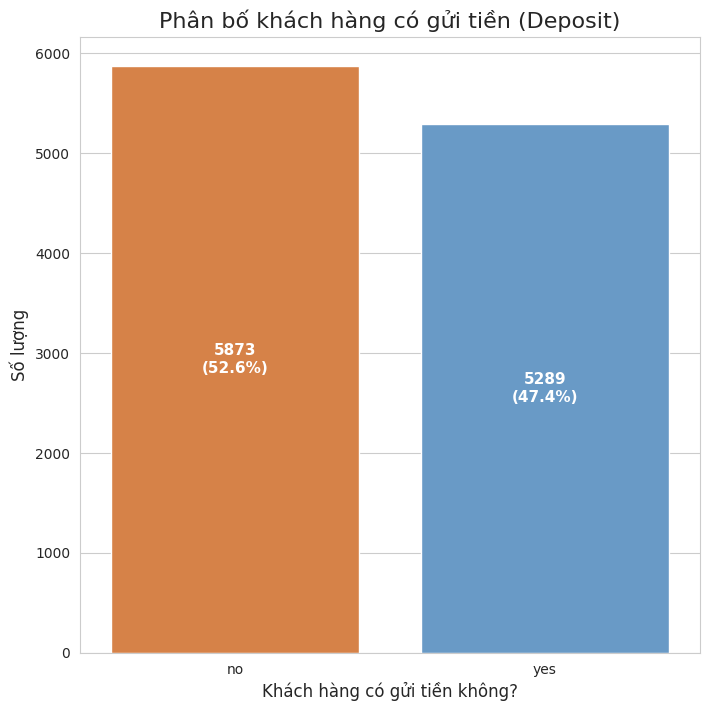

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Vẽ biểu đồ đếm cho biến 'deposit'
plt.figure(figsize=(8, 8))
ax = sns.countplot(
    x='deposit',
    data=df,
    hue='deposit',
    palette=['#5A9BD5', '#ED7D31'],
    order=['no', 'yes'],
    legend=False
)

# Thêm tiêu đề và nhãn
plt.title('Phân bố khách hàng có gửi tiền (Deposit)', fontsize=16)
plt.xlabel('Khách hàng có gửi tiền không?', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị số lượng và phần trăm BÊN TRONG cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height * 0.5,  # Giữa cột
        f'{int(height)}\n({height/len(df)*100:.1f}%)',
        ha="center", va='center',
        fontsize=11, color='white', weight='bold'
    )

plt.show()


Biểu đồ "Tần suất của biến mục tiêu **deposit**" được sử dụng để đánh giá sự phân bố giữa các lớp dữ liệu, ở đây cụ thể là khách hàng có gửi tiền tiết kiệm hay không. Kết quả phân tích chỉ ra rằng bộ dữ liệu có sự cân bằng cao giữa hai lớp quyết định của khách hàng.

Cụ thể: Có 5.873 mẫu thuộc lớp "Không gửi tiền" (chiếm 52.6%) và 5.289 mẫu thuộc lớp "Gửi tiền" (chiếm 47.4%).

Kết luận: Sự cân bằng gần như 1:1 giữa hai lớp là một điều kiện lý tưởng để huấn luyện mô hình dự đoán. Điều này giúp giảm nguy cơ thiên lệch (bias) về phía nhóm chiếm đa số – một vấn đề thường gây khó khăn trong các bài toán phân loại. Nhờ đó, mô hình có thể học được đặc trưng của cả hai nhóm một cách khách quan hơn, từ đó nâng cao độ chính xác và tính khái quát khi áp dụng vào dữ liệu thực tế.

## *b) Biểu đồ Tỷ lệ gửi tiền theo Nghề nghiệp*

<Figure size 1200x800 with 0 Axes>

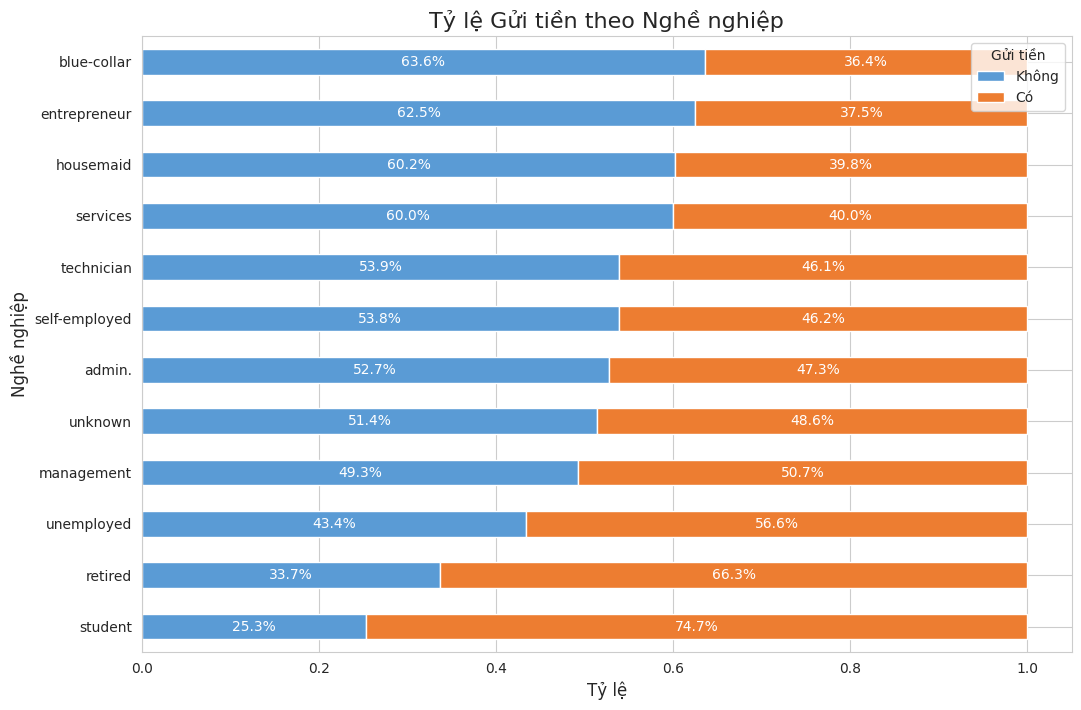

In [15]:
plt.figure(figsize=(12, 8))

# Tạo bảng chéo
job_crosstab = pd.crosstab(df['job'], df['deposit'])
job_crosstab_pct = job_crosstab.div(job_crosstab.sum(axis=1), axis=0)

# Sắp xếp theo tỷ lệ 'yes' giảm dần
job_crosstab_pct_sorted = job_crosstab_pct.sort_values(by='yes', ascending=False)

# Vẽ biểu đồ stacked bar
ax = job_crosstab_pct_sorted.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#5A9BD5', '#ED7D31'])

plt.title('Tỷ lệ Gửi tiền theo Nghề nghiệp', fontsize=16)
plt.xlabel('Tỷ lệ', fontsize=12)
plt.ylabel('Nghề nghiệp', fontsize=12)
plt.legend(title='Gửi tiền', labels=['Không', 'Có'])

# Thêm giá trị phần trăm lên từng thanh
for i, (index, row) in enumerate(job_crosstab_pct_sorted.iterrows()):
    left = 0  # vị trí bắt đầu của phần bar màu đầu tiên
    for j, col in enumerate(job_crosstab_pct_sorted.columns):
        width = row[col]
        if width > 0.01:  # chỉ hiện giá trị nếu phần trăm > 1%
            ax.text(left + width / 2, i, f'{width:.1%}', ha='center', va='center', color='white', fontsize=10)
        left += width

plt.show()


Phân tích biểu đồ cho thấy có một mối liên hệ rõ nét giữa nghề nghiệp của khách hàng và khả năng họ đăng ký sản phẩm tiền gửi. Cụ thể, nhóm "Sinh viên", "Đã nghỉ hưu" và "Thất nghiệp" có tỷ lệ gửi tiền cao nhất trong tất cả các nghề nghiệp được khảo sát. Ngược lại, những khách hàng làm "Công nhân" và trong ngành "Dịch vụ" lại có tỷ lệ đăng ký thấp hơn hẳn so với mức trung bình.

Điều này cho thấy nghề nghiệp là một yếu tố quan trọng giúp phân khúc khách hàng hiệu quả. Dựa trên kết quả này, các chiến dịch marketing nên tập trung nhiều hơn vào những nhóm có tỷ lệ chuyển đổi cao để tận dụng tối đa nguồn lực và nâng cao hiệu quả kinh doanh.



## *c) Phân tích ảnh hưởng của Tuổi (age) và Thời gian cuộc gọi (duration)*

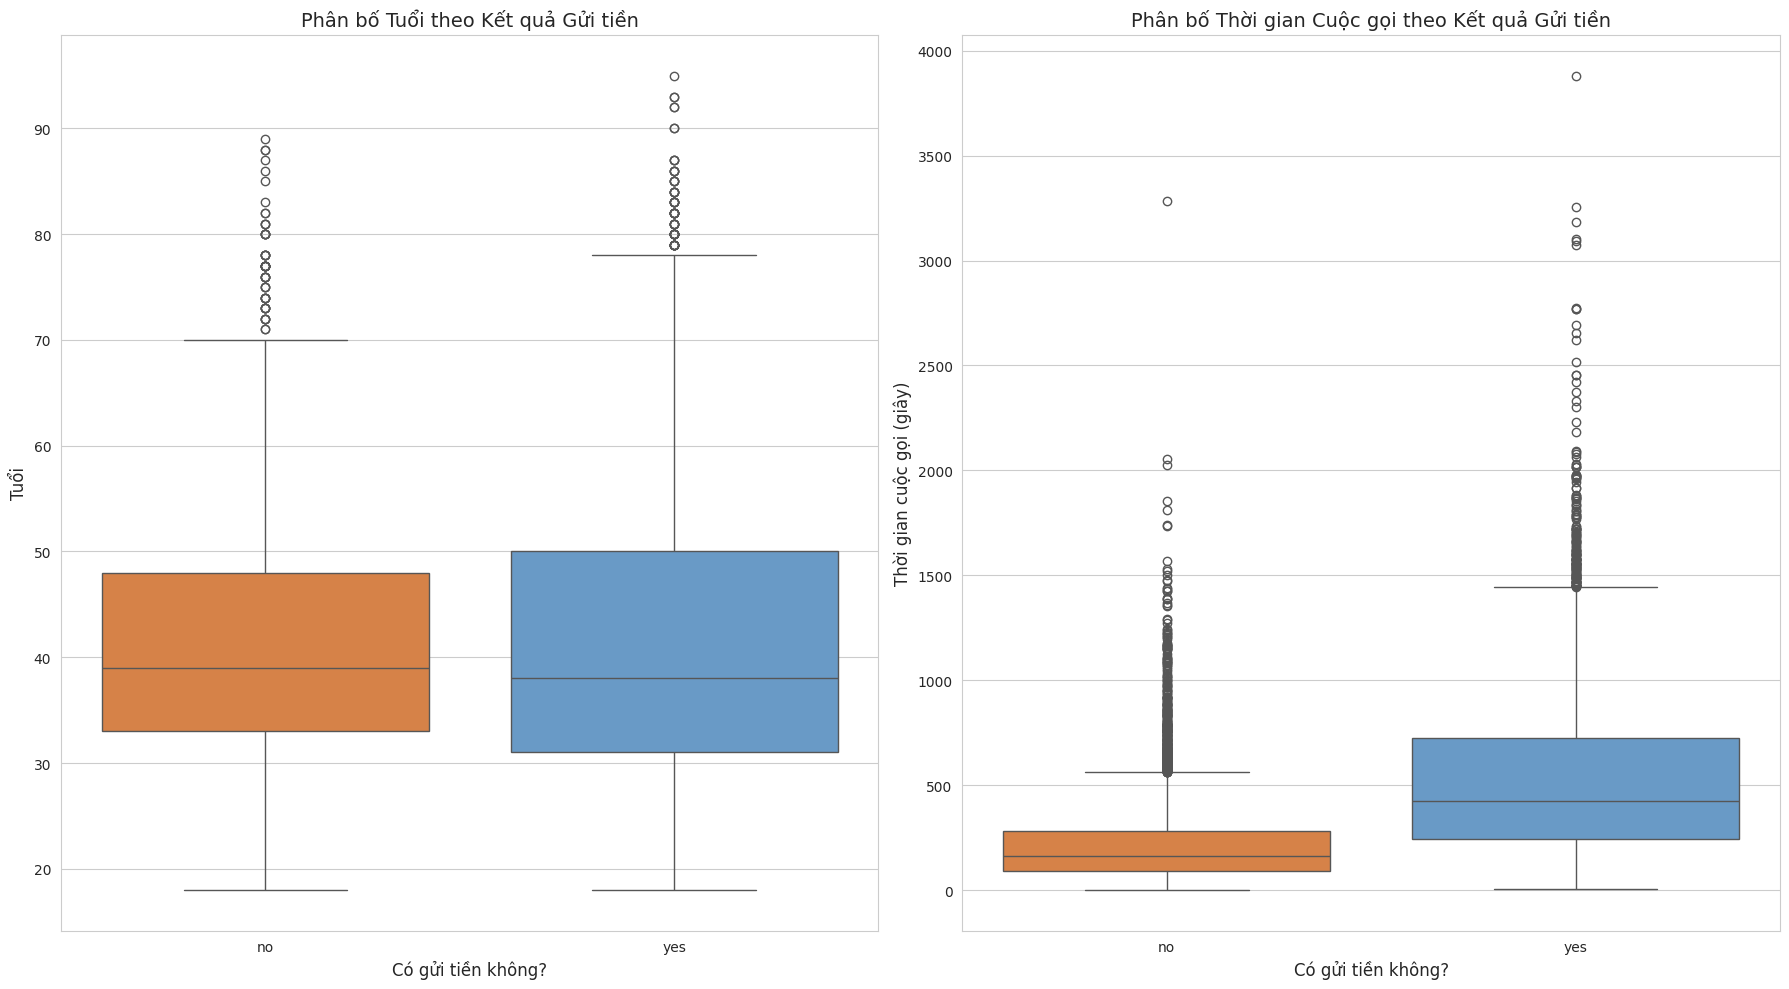

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Biểu đồ hộp cho Tuổi và Gửi tiền
sns.boxplot(x='deposit', y='age', data=df, ax=axes[0], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[0].set_title('Phân bố Tuổi theo Kết quả Gửi tiền', fontsize=14)
axes[0].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[0].set_ylabel('Tuổi', fontsize=12)

# Biểu đồ hộp cho Thời gian cuộc gọi và Gửi tiền
sns.boxplot(x='deposit', y='duration', data=df, ax=axes[1], hue = 'deposit', palette=['#5A9BD5', '#ED7D31'], order=['no', 'yes'])
axes[1].set_title('Phân bố Thời gian Cuộc gọi theo Kết quả Gửi tiền', fontsize=14)
axes[1].set_xlabel('Có gửi tiền không?', fontsize=12)
axes[1].set_ylabel('Thời gian cuộc gọi (giây)', fontsize=12)

plt.tight_layout()
plt.show()

Biểu đồ hộp được dùng để so sánh phân bố của các biến số liên tục là age và duration giữa hai nhóm quyết định "Gửi tiền" và "Không gửi tiền".

Về Tuổi (age): Phân tích cho thấy không có sự khác biệt đáng kể về độ tuổi trung vị (median) giữa hai nhóm khách hàng. Điều này ngụ ý rằng tuổi tác không phải là một yếu tố mang tính quyết định hay phân biệt rõ ràng trong việc đăng ký sản phẩm tiền gửi của ngân hàng trong tập dữ liệu này.

Về Thời gian cuộc gọi (duration): Trái ngược với tuổi, thời gian cuộc gọi thể hiện một sự khác biệt mang ý nghĩa thống kê sâu sắc. Nhóm khách hàng quyết định gửi tiền có thời gian đàm thoại (cả giá trị trung vị và khoảng phân vị) cao hơn hẳn so với nhóm từ chối.

Kết luận: Thời gian cuộc gọi là một biến dự báo rất quan trọng, có thể phản ánh trực tiếp mức độ quan tâm và sự tương tác tích cực của khách hàng đối với sản phẩm được tư vấn. Trong khi đó, yếu tố tuổi tác lại có ảnh hưởng không đáng kể.

## *d) Biểu đồ so sánh thang đo các biến số*

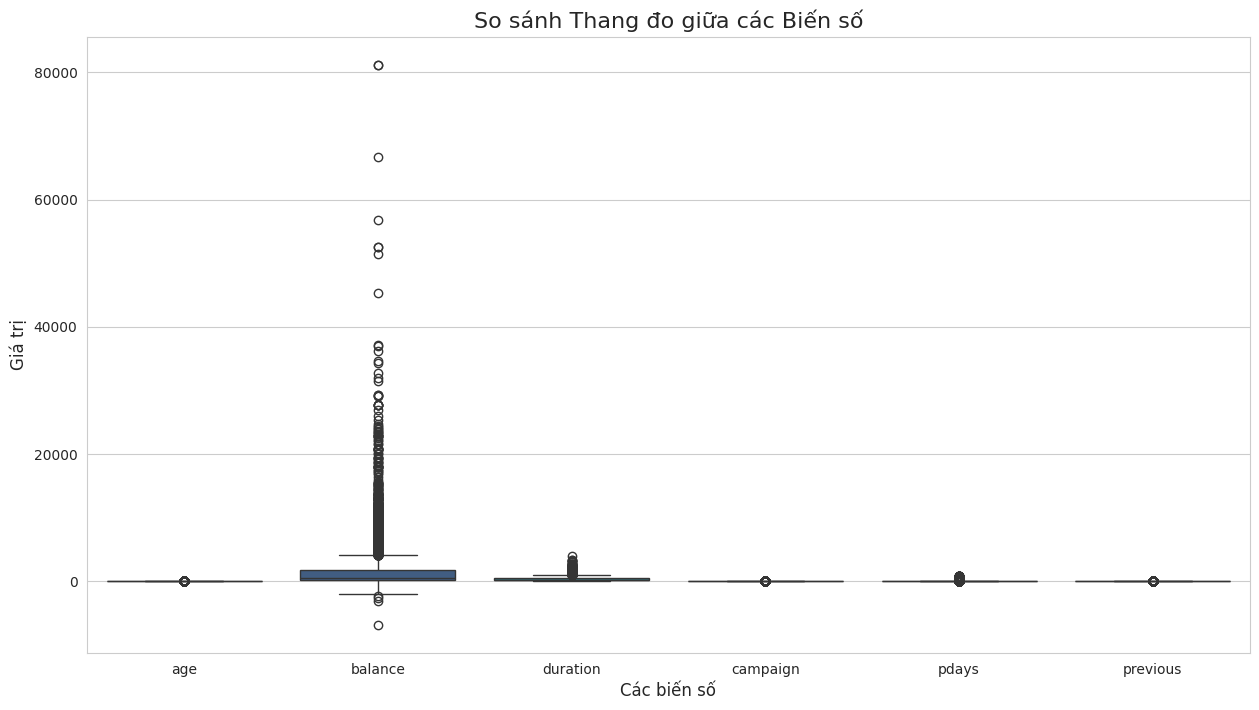

In [17]:
# Chọn các cột dữ liệu dạng số để vẽ biểu đồ
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerical = df[numerical_cols]

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numerical, palette='viridis')
plt.title('So sánh Thang đo giữa các Biến số', fontsize=16)
plt.ylabel('Giá trị', fontsize=12)
plt.xlabel('Các biến số', fontsize=12)
plt.show()

Biểu đồ trên mang lại một cái nhìn trực quan và rõ ràng về vấn đề khác biệt thang đo giữa các biến trong tập dữ liệu.

1. Sự thống trị của biến balance
Biến balance (số dư tài khoản) có phạm vi giá trị và độ biến thiên (variance) lớn vượt trội so với các biến còn lại. Thang đo của nó lên tới hàng nghìn, trong khi hầu hết các biến khác chỉ dao động trong khoảng hàng chục hoặc hàng trăm. Điều này khiến cho biểu đồ hộp (box plot) của các biến còn lại gần như bị "nén xuống", rất khó quan sát chi tiết.

2. Sự chênh lệch giữa các biến
Ngay cả khi loại bỏ balance khỏi biểu đồ, chúng ta vẫn thấy sự khác biệt đáng kể về thang đo giữa các biến. Chẳng hạn, duration (thời gian cuộc gọi) thường có giá trị lên tới hàng trăm giây, trong khi age (tuổi) chủ yếu nằm ở mức vài chục, và các biến như campaign hay previous thường chỉ là những con số nhỏ (dưới 10).

3. Vì sao đây là vấn đề nghiêm trọng?
Với những mô hình nhạy cảm với khoảng cách như Mạng nơ-ron nhân tạo (ANN), sự khác biệt về thang đo này có thể gây hiểu nhầm nghiêm trọng. Chẳng hạn, một thay đổi nhỏ trong balance sẽ được mô hình coi là quan trọng hơn nhiều so với một thay đổi lớn trong age hay campaign, chỉ vì giá trị tuyệt đối của nó lớn hơn. Điều này không phản ánh đúng bản chất của dữ liệu và có thể khiến mô hình học sai lệch, dẫn đến kết quả không ổn định và kém chính xác.

KẾT LUẬN: Biểu đồ đã chỉ ra rất rõ rằng Chuẩn hóa dữ liệu (Data Scaling) là một bước bắt buộc trong quá trình tiền xử lý, đặc biệt khi áp dụng các mô hình học sâu như ANN. Đây không phải là một lựa chọn tùy ý, mà là điều kiện tiên quyết để đảm bảo mô hình có thể học một cách công bằng và hiệu quả từ tất cả các đặc trưng đầu vào.


## *e) Nhận xét bộ dữ liệu gốc*

###I. Điểm Tốt (Có thể giữ lại hoặc sử dụng trực tiếp)

Sự Cân Bằng của Biến Mục Tiêu (deposit):

- Hiện trạng: Tỷ lệ giữa lớp "Gửi tiền" (47.4%) và "Không gửi tiền" (52.6%) gần như là 1:1.
- Đánh giá: Đây là ưu điểm lớn nhất của bộ dữ liệu. Nó cho phép chúng ta xây dựng mô hình mà không cần áp dụng các kỹ thuật xử lý mất cân bằng phức tạp (như SMOTE hay điều chỉnh trọng số lớp). Mô hình sẽ học được đặc điểm của cả hai lớp một cách công bằng, và các chỉ số đánh giá như độ chính xác (accuracy) sẽ trở nên đáng tin cậy hơn.

Tính Hoàn Chỉnh của Dữ liệu (Không có giá trị thiếu):

- Hiện trạng: Bộ dữ liệu không chứa các ô giá trị bị bỏ trống (null/NaN).
- Đánh giá: Điều này giúp chúng ta tiết kiệm được một bước xử lý dữ liệu phức tạp là điền giá trị thiếu (imputation). Dữ liệu sạch và đầy đủ cho phép chúng ta tiến thẳng đến các bước xử lý quan trọng hơn.


###II. Điểm Cần Cải Thiện (Yêu cầu Tiền xử lý)

Sự tồn tại của Dữ liệu dạng Chuỗi (Categorical Data):

- Hiện trạng: Rất nhiều cột quan trọng đang ở định dạng văn bản, không phải dạng số. Ví dụ: job, marital, education, contact, poutcome, month. Các cột nhị phân như default, housing, loan, deposit cũng đang là 'yes'/'no'.
- Vấn đề: Mô hình ANN chỉ có thể xử lý các con số. Nó không hiểu được giá trị "management" hay "married" có ý nghĩa gì.

Giải pháp tiền xử lý:

- Mã hóa One-Hot (One-Hot Encoding): Đối với các cột có nhiều hơn hai loại giá trị (ví dụ: job, education), chúng ta cần chuyển mỗi giá trị thành một cột nhị phân (0/1) riêng biệt.
- Mã hóa Nhị phân (Binary Encoding): Đối với các cột chỉ có hai giá trị 'yes'/'no' (ví dụ: housing, loan, và chính cột deposit), chúng ta sẽ chuyển đổi chúng thành 0 và 1.

Sự khác biệt về Thang đo giữa các Biến số:
- Hiện trạng: Các cột số có đơn vị và khoảng giá trị rất khác nhau. Ví dụ, balance (số dư tài khoản) có thể lên tới hàng chục nghìn, trong khi campaign (số lần liên hệ) thường chỉ là những con số nhỏ.
- Vấn đề: Khi đưa vào mô hình ANN, các thuộc tính có giá trị lớn (như balance) sẽ "lấn át" và có tác động không cân xứng lên quá trình học so với các thuộc tính có giá trị nhỏ, làm cho mô hình hội tụ chậm và kém hiệu quả.

Giải pháp tiền xử lý:
- Chuẩn hóa Dữ liệu (Scaling): Chúng ta cần đưa tất cả các biến số về một thang đo chung. Phương pháp phổ biến là Standardization (Chuẩn hóa Z-score), giúp biến đổi dữ liệu sao cho có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.